# 종합실습1 단변량 분석

# 1.비즈니스 시나리오

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 고객사는 카시트를 판매하는 회사 입니다.
    * 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
        * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
        * 너무 국내 시장에 집중됨.
        * 지역마다의 구매력을 제대로 파악하지 못하고 있음.
    * 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.

* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
    * 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
    * 드디어 AIVLE 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
    * 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


# 2.환경준비

## (1) 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## (2) 데이터 로딩 : 카시트 판매량 데이터

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(Yes,No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes,No)	|	feature	|


In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


# 3.단변량분석 : 숫자형 변수

## (1) Sales (Target) 

In [75]:
var = 'Sales'

1) 변수의 비즈니스 의미

* 각 지역 판매량(단위 : 1000개)
* Target

2) 기초통계량(수치화)

In [76]:
data[var].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

3) 분포 확인(시각화)

In [82]:
def eda1_n(data, var, bins = 20) :
    display(data[[var]].describe().T)
    
    plt.figure(figsize = (12,8))
    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = 20, kde = True)

    plt.subplot(2,1,2)
    sns.boxplot(data[var])

    plt.tight_layout()
    plt.show()

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


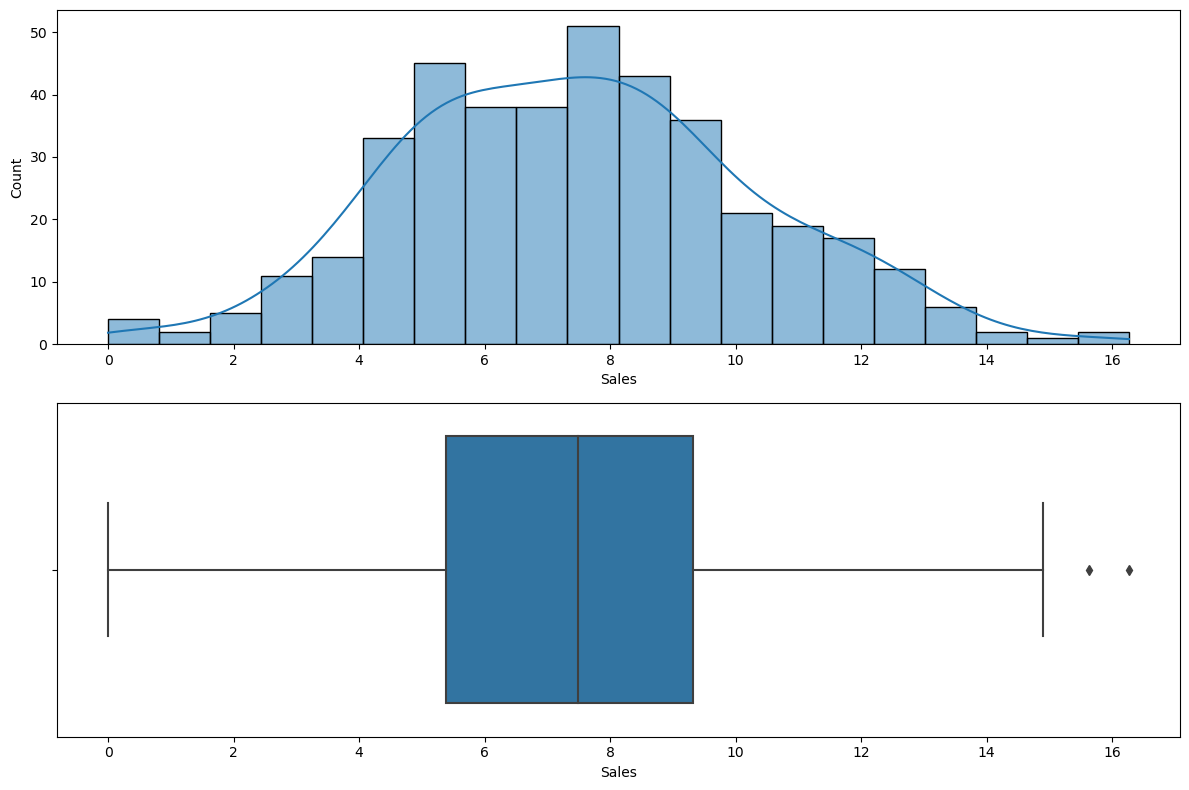

In [83]:
eda1_n(data, 'Sales', 30)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 대부분의 판매량이 5천개 ~ 만개 사이

5) 추가 분석해 볼 사항이 있나요?

* 판매량 구간을 0 ~ 4천, 4천 ~ 1만, 1만 이상 으로 구분해서 분석해 볼 필요 있음.

## (2) CompPrice

In [84]:
var = 'CompPrice'

1) 변수의 비즈니스 의미

* 경쟁사 가격(단위 : 달러)
* Feature

2) 기초통계량(수치화)

In [85]:
data[var].describe()

count    400.000000
mean     124.975000
std       15.334512
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
CompPrice,400.0,124.975,15.334512,77.0,115.0,125.0,135.0,175.0


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


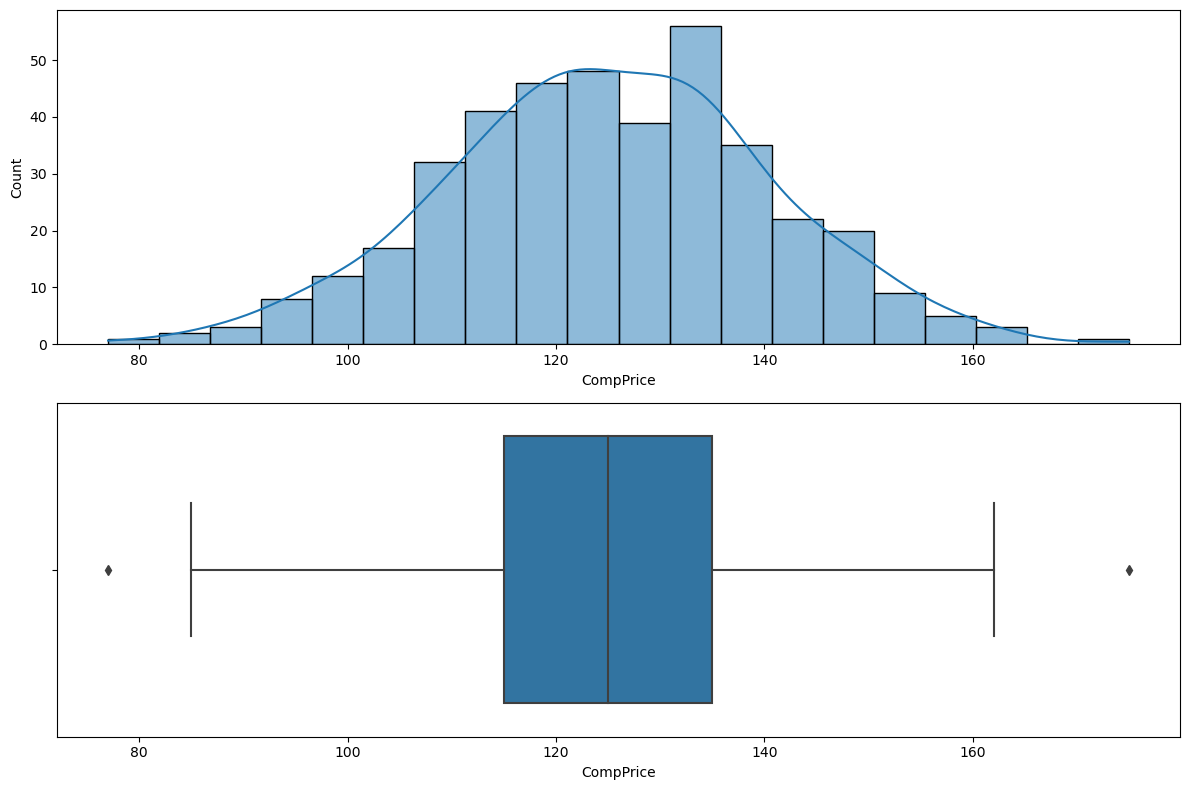

In [86]:
eda1_n(data, var, 60)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

130

5) 추가 분석해 볼 사항이 있나요?

## (3) Income

In [55]:
var = 'Income'

1) 변수의 비즈니스 의미

* 지역 평균 소득 (단위: 1000달러)
* Feature

2) 기초통계량(수치화)

In [56]:
data[var].describe()

count    400.000000
mean      68.657500
std       27.986037
min       21.000000
25%       42.750000
50%       69.000000
75%       91.000000
max      120.000000
Name: Income, dtype: float64

3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Income,400.0,68.6575,27.986037,21.0,42.75,69.0,91.0,120.0


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


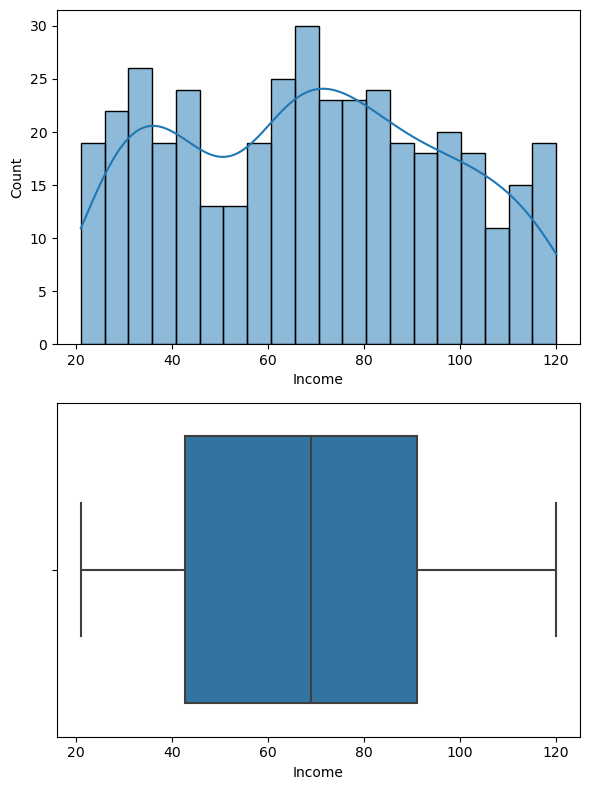

In [57]:
eda1_n(data, var,500)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?

## (4) Advertising

In [92]:
var = 'Advertising'

1) 변수의 비즈니스 의미

* 각 지역, 회사의 광고 예산(단위: 1000달러)
* Feature

2) 기초통계량(수치화)

In [93]:
data[var].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Advertising,400.0,6.635,6.650364,0.0,0.0,5.0,12.0,29.0


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


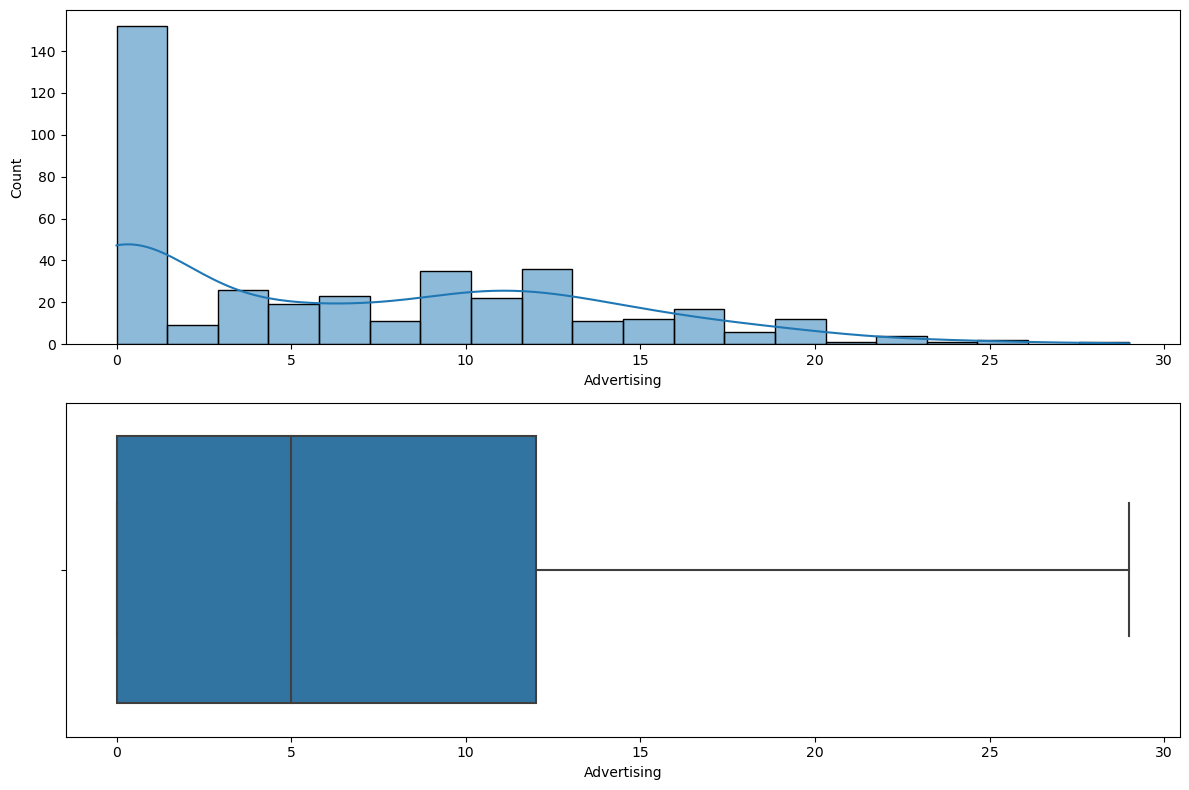

In [95]:
eda1_n(data, var, 30)

,count,mean,std,min,25%,50%,75%,max
Advertising,256.0,10.367188,5.509879,1.0,6.0,10.0,14.0,29.0


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


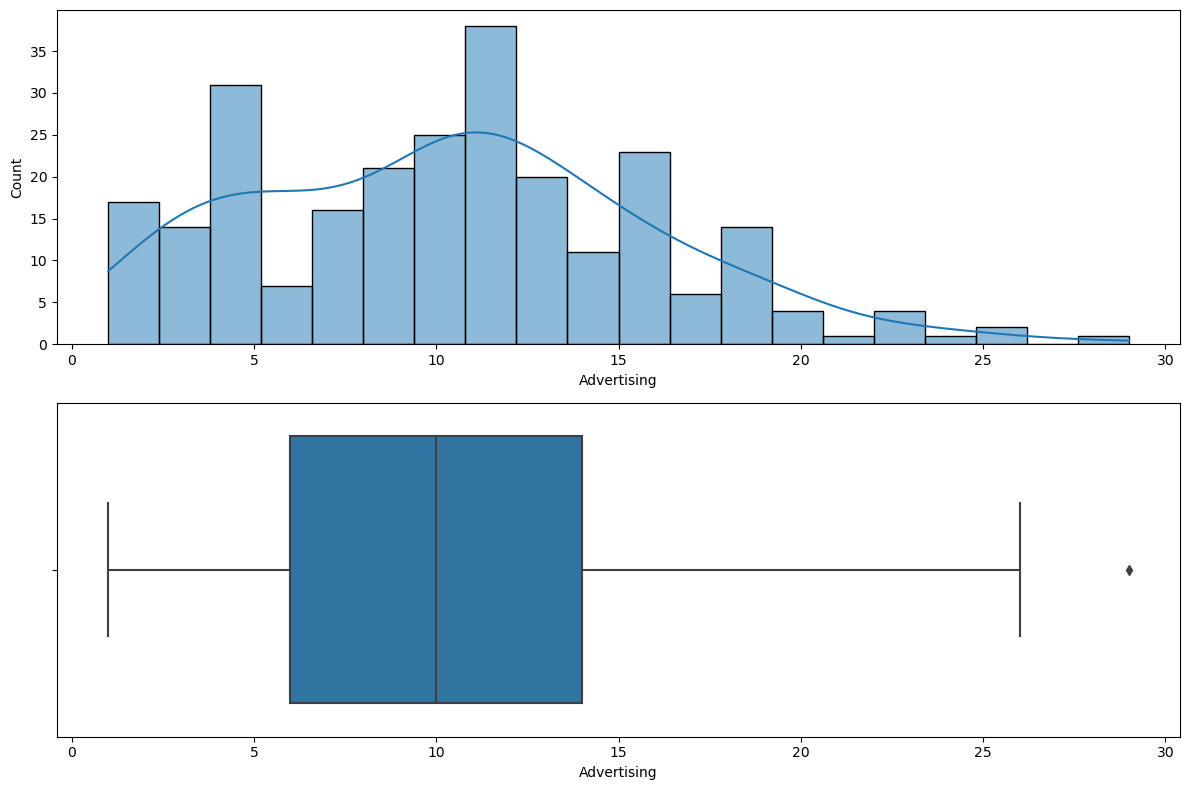

In [96]:
temp = data.loc[data['Advertising']>0]
eda1_n(temp, 'Advertising', 30)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

0 부근에 왜 광고비가 몰려있는가
입소문 마케팅?
0을 제외한 나머지 광고비 비율을 보고싶다.
굴곡이 두개가 보이는것 같다.
10000달러 이상과 이하로 나뉘는 부분에 차이가 있는가?

5) 추가 분석해 볼 사항이 있나요?

## (5) Population

In [111]:
var = 'Population'

1) 변수의 비즈니스 의미

* 지역 인구수(단위: 1000명)
* Feature

2) 기초통계량(수치화)

In [112]:
data[var].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Population,400.0,264.84,147.376436,10.0,139.0,272.0,398.5,509.0


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


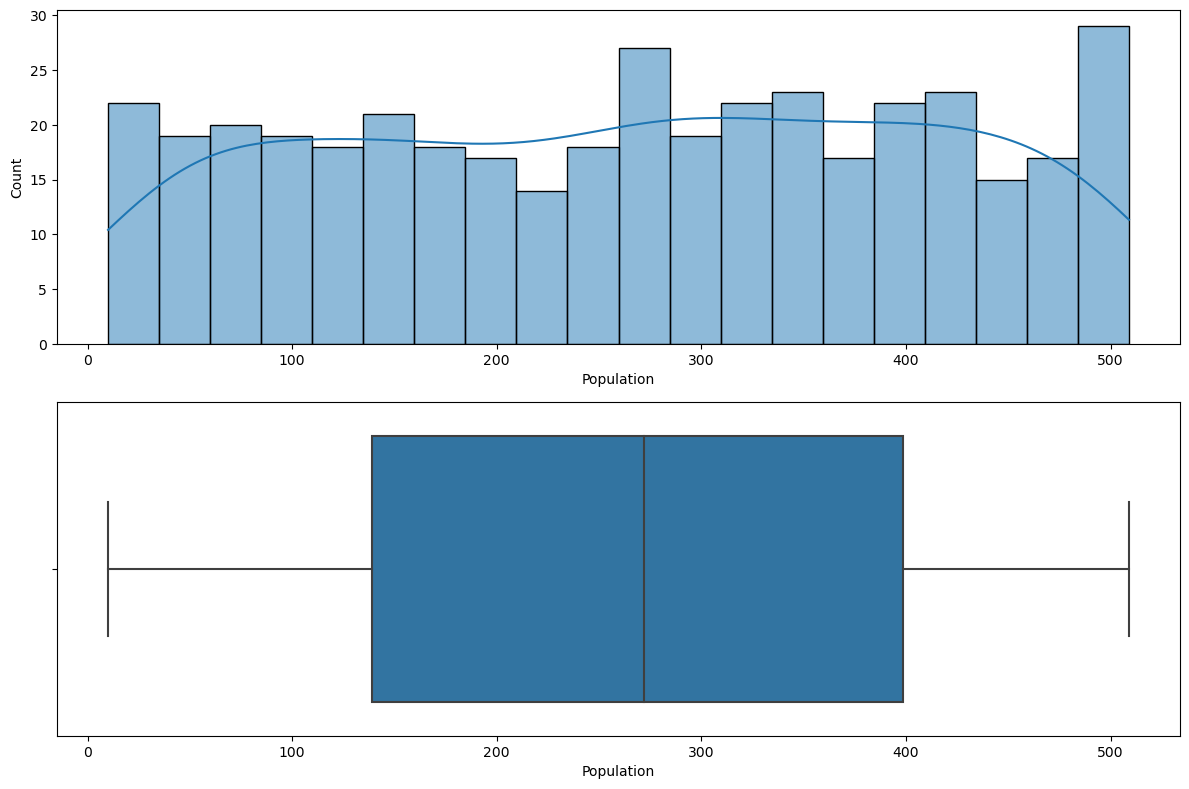

In [113]:
eda1_n(data, var, 30)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

너무 분포가 고르다.
혹시 샘플링할때 랜덤 샘플링이 아니고 따로 제어하지 않았을까?

5) 추가 분석해 볼 사항이 있나요?

## (6) Price

In [87]:
var = 'Price'

1) 변수의 비즈니스 의미

* 자사 지역별 판매 가격
* Feature

2) 기초통계량(수치화)

In [88]:
data[var].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Price,400.0,115.795,23.676664,24.0,100.0,117.0,131.0,191.0


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


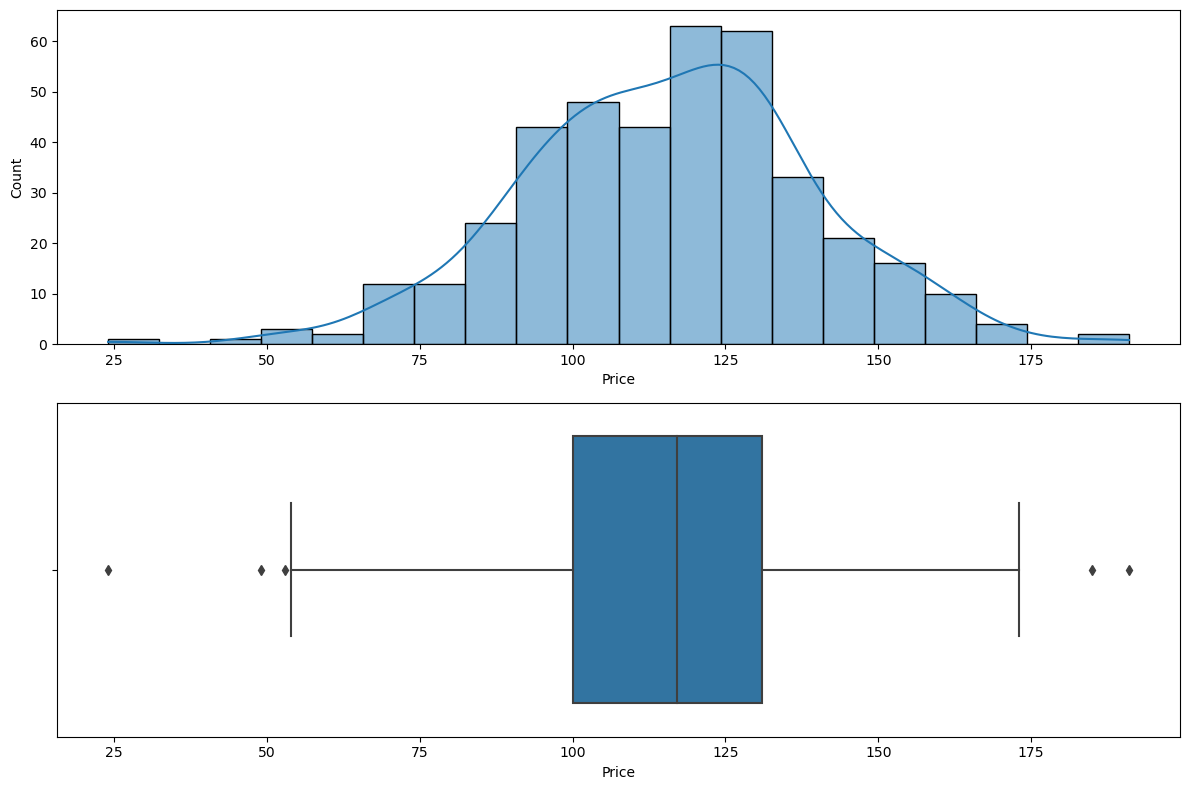

In [89]:
eda1_n(data, var, 30)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?

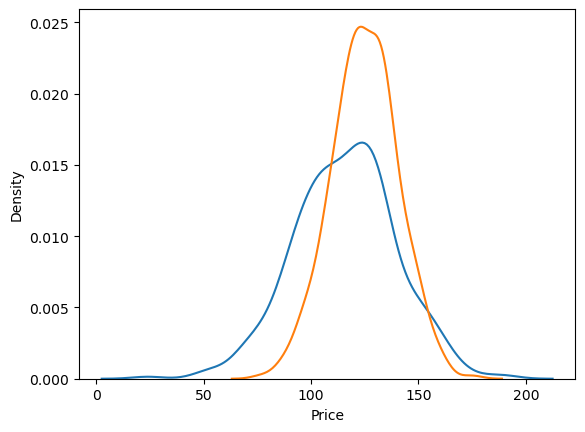

In [91]:
sns.kdeplot(x = 'Price', data = data) # 자사, 파랑
sns.kdeplot(x = 'CompPrice', data = data) #타사, 주황
plt.show()

## (7) Age

In [114]:
var = 'Age'

1) 변수의 비즈니스 의미

* 지역 인구의 평균 연령
* Feature

2) 기초통계량(수치화)

In [115]:
data[var].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Age,400.0,53.3225,16.200297,25.0,39.75,54.5,66.0,80.0


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


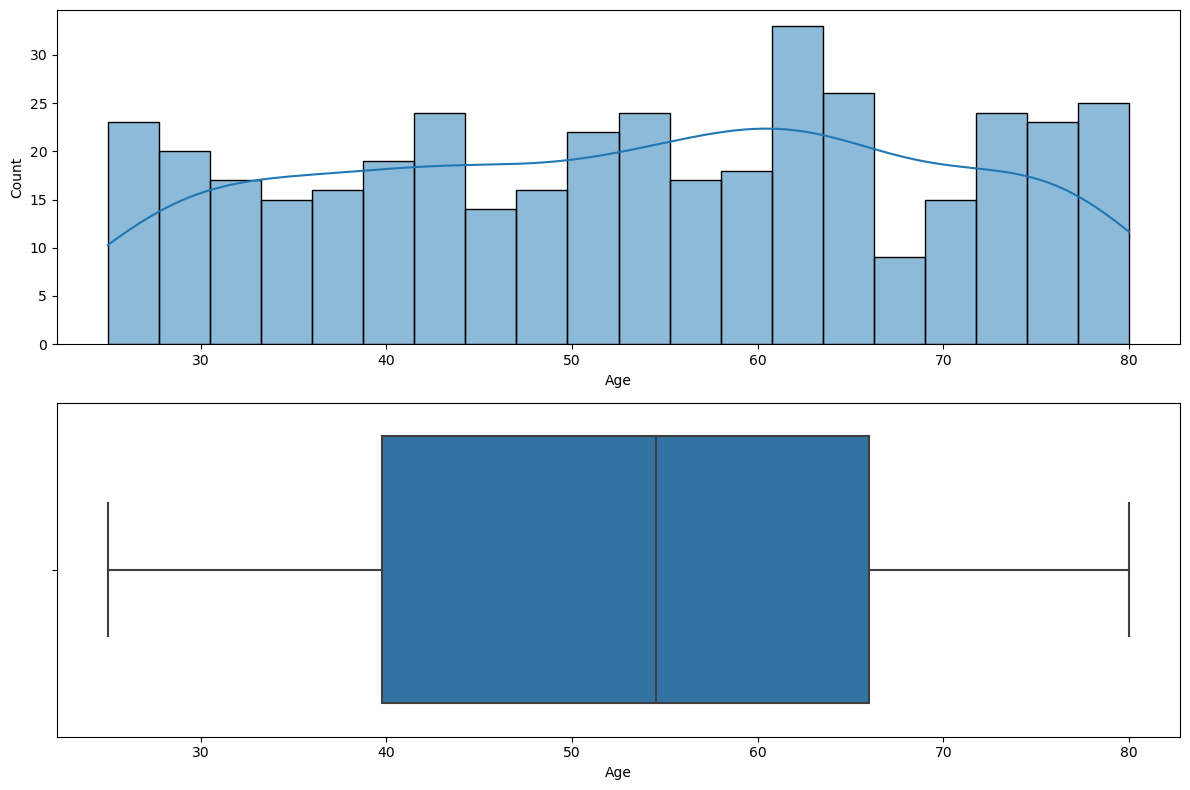

In [116]:
eda1_n(data, var, 30)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

분포가 너무 고르다
20대와 80대가 왜 높은가?

5) 추가 분석해 볼 사항이 있나요?

# 4.단변량분석 : 범주형 변수

## (1) ShelveLoc

In [97]:
var = 'ShelveLoc'

1) 변수의 비즈니스 의미

* 매장 진열상태

2) 기초통계량(수치화)

In [98]:
# 범주별 빈도수
data[var].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [109]:
# 범주별 비율
def eda1_c(data, var):
    print(data[var].value_counts())
    print(data[var].value_counts() / data[var].shape[0])

    sns.countplot(x=data[var]) # order는 x축 순서를 지정해준다.
    plt.grid()
    plt.show()

3) 분포 확인(시각화)

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64


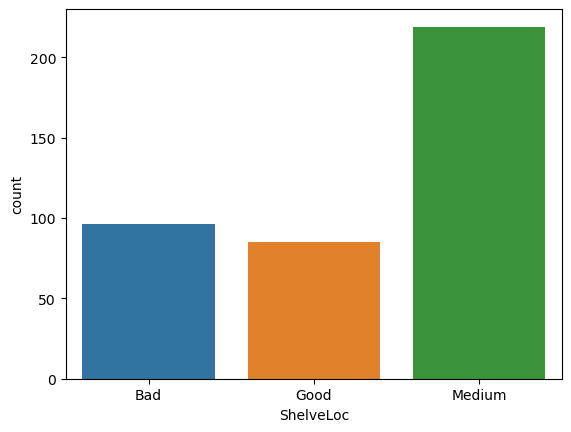

In [106]:
eda1_c(data, 'ShelveLoc')

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 진열 상태가 중간 정도 가 54%

5) 추가 분석해 볼 사항이 있나요?

* 진열상태에 따른 판매량 차이
* 지역, 인구수와 진열 상태 관계 비교

## (2) Urban

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

3) 분포 확인(시각화)

Yes    282
No     118
Name: Urban, dtype: int64
Yes    0.705
No     0.295
Name: Urban, dtype: float64


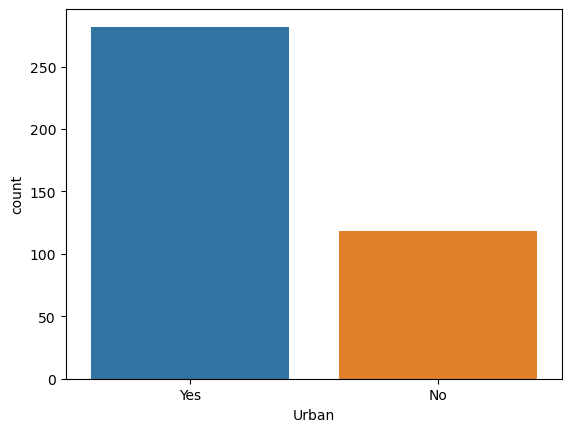

In [107]:
eda1_c(data, 'Urban')

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?

## (3) US

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

3) 분포 확인(시각화)

Yes    258
No     142
Name: US, dtype: int64
Yes    0.645
No     0.355
Name: US, dtype: float64


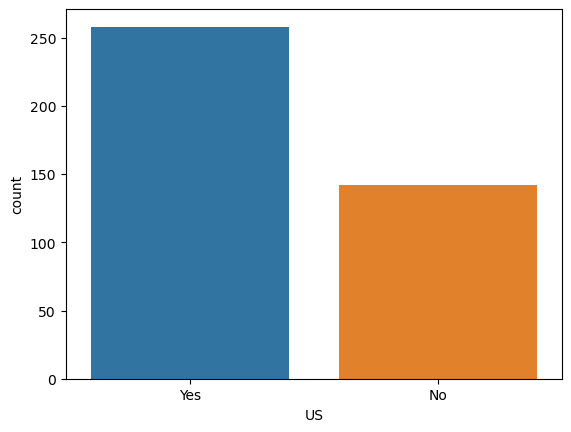

In [108]:
eda1_c(data, 'US')

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

5) 추가 분석해 볼 사항이 있나요?